## Economy Analysis

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data

In [307]:
df = pd.read_csv('/Users/aathik/Documents/Uwin/ADT/Project/Notebooks2/PROJECT-ADT/economy.csv')

#### Data Preprocessing

In [308]:
df.tail()

,Area,Item,Year,Value
405,Uruguay,Percentage of the population unable to afford ...,2017,2.8
406,Uruguay,Percentage of the population unable to afford ...,2018,3.0
407,Uruguay,Percentage of the population unable to afford ...,2019,3.3
408,Uruguay,Percentage of the population unable to afford ...,2020,5.3
409,Uruguay,Percentage of the population unable to afford ...,2021,5.2


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    410 non-null    object 
 1   Item    410 non-null    object 
 2   Year    410 non-null    int64  
 3   Value   397 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


In [310]:
df.isnull().sum()

Area      0
Item      0
Year      0
Value    13
dtype: int64

In [311]:
mean_values = df.groupby(['Area', 'Item'])['Value'].transform('mean')
print(mean_values)
# Fill the NaN values in the 'Value' column with the corresponding mean values
df['Value'].fillna(mean_values, inplace=True)

# Print the DataFrame with NaN values replaced by mean values
df.head()

0      4.1902
1      4.1902
2      4.1902
3      4.1902
4      4.1902
        ...  
405    3.9200
406    3.9200
407    3.9200
408    3.9200
409    3.9200
Name: Value, Length: 410, dtype: float64


,Area,Item,Year,Value
0,Albania,Cost of a healthy diet (PPP dollar per person ...,2017,3.952
1,Albania,Cost of a healthy diet (PPP dollar per person ...,2018,4.069
2,Albania,Cost of a healthy diet (PPP dollar per person ...,2019,4.262
3,Albania,Cost of a healthy diet (PPP dollar per person ...,2020,4.280
4,Albania,Cost of a healthy diet (PPP dollar per person ...,2021,4.388


In [305]:
df['Value'].fillna(0, inplace=True)

In [289]:
df.isnull().sum()

Area     0
Item     0
Year     0
Value    0
dtype: int64

In [290]:
# Filter rows with Cost of a healthy diet
cost_df = df[df['Item'] == 'Cost of a healthy diet (PPP dollar per person per day)']

# Filter rows with Percentage of the population unable to afford a healthy diet
percentage_df = df[df['Item'] == 'Percentage of the population unable to afford a healthy diet (percent)']

cost_df.tail()


,Area,Item,Year,Value
400,Uruguay,Cost of a healthy diet (PPP dollar per person ...,2017,3.073
401,Uruguay,Cost of a healthy diet (PPP dollar per person ...,2018,3.170
402,Uruguay,Cost of a healthy diet (PPP dollar per person ...,2019,3.254
403,Uruguay,Cost of a healthy diet (PPP dollar per person ...,2020,3.414
404,Uruguay,Cost of a healthy diet (PPP dollar per person ...,2021,3.543


In [291]:
percentage_df.head()

,Area,Item,Year,Value
5,Albania,Percentage of the population unable to afford ...,2017,31.3
6,Albania,Percentage of the population unable to afford ...,2018,23.0
7,Albania,Percentage of the population unable to afford ...,2019,22.2
8,Albania,Percentage of the population unable to afford ...,2020,19.9
9,Albania,Percentage of the population unable to afford ...,2021,15.9


In [292]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 404
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    205 non-null    object 
 1   Item    205 non-null    object 
 2   Year    205 non-null    int64  
 3   Value   205 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ KB


In [293]:
mean_cost_df = cost_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()

print(mean_cost_df)

        Area  Year  Value
0    Albania  2017  3.952
1    Albania  2018  4.069
2    Albania  2019  4.262
3    Albania  2020  4.280
4    Albania  2021  4.388
..       ...   ...    ...
200  Uruguay  2017  3.073
201  Uruguay  2018  3.170
202  Uruguay  2019  3.254
203  Uruguay  2020  3.414
204  Uruguay  2021  3.543

[205 rows x 3 columns]


#### Analysis

###### Cost of a healthy diet (PPP dollar per person per day) of each Country

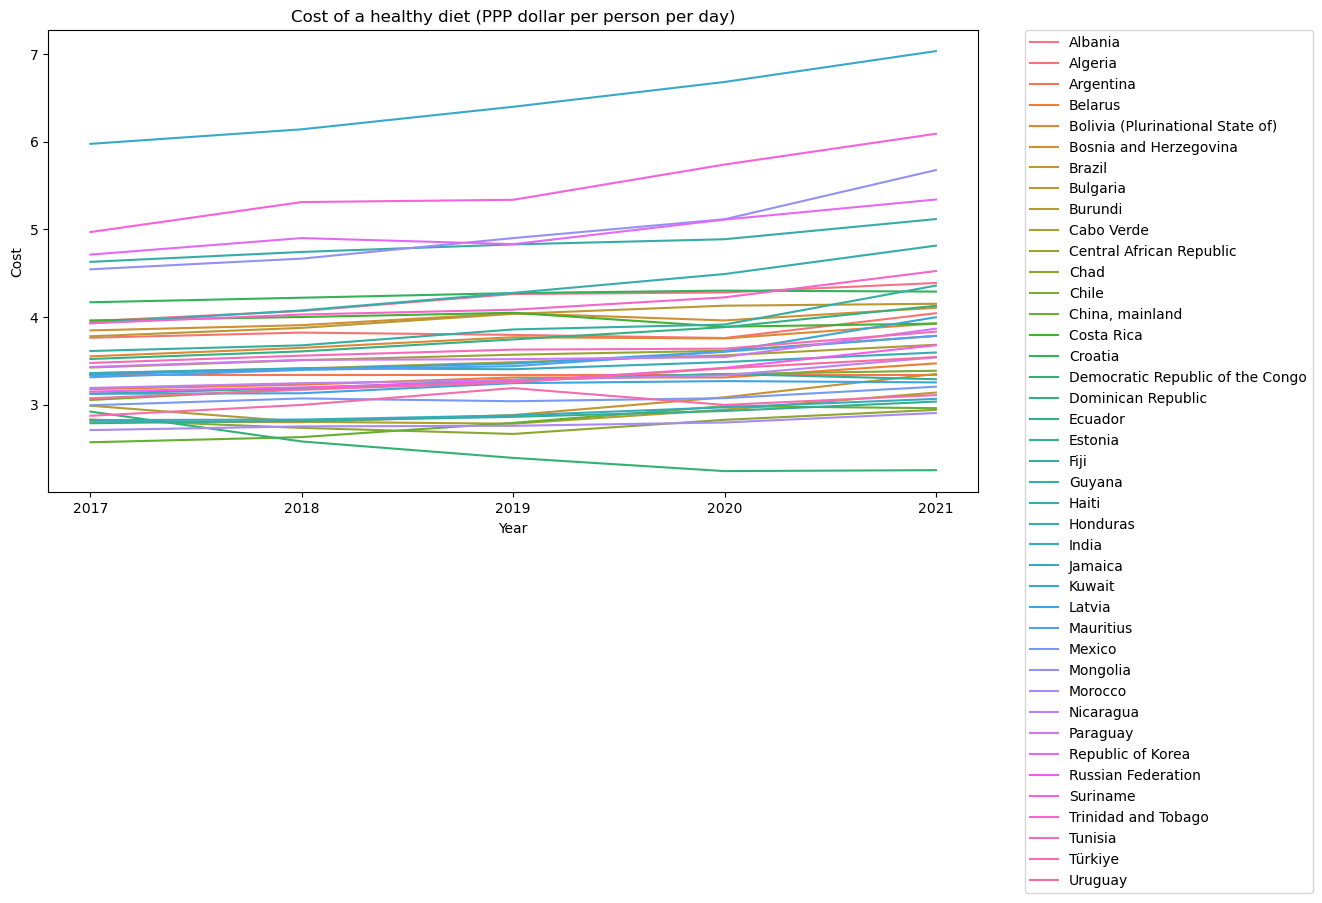

In [304]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Area', data=mean_cost_df)
plt.title('Cost of a healthy diet (PPP dollar per person per day)')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.xticks(df['Year'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [295]:
mean_percentage_df = percentage_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()

print(mean_percentage_df)

        Area  Year  Value
0    Albania  2017   31.3
1    Albania  2018   23.0
2    Albania  2019   22.2
3    Albania  2020   19.9
4    Albania  2021   15.9
..       ...   ...    ...
200  Uruguay  2017    2.8
201  Uruguay  2018    3.0
202  Uruguay  2019    3.3
203  Uruguay  2020    5.3
204  Uruguay  2021    5.2

[205 rows x 3 columns]


###### Percentage of the population unable to afford a healthy diet (percent) of Each Country

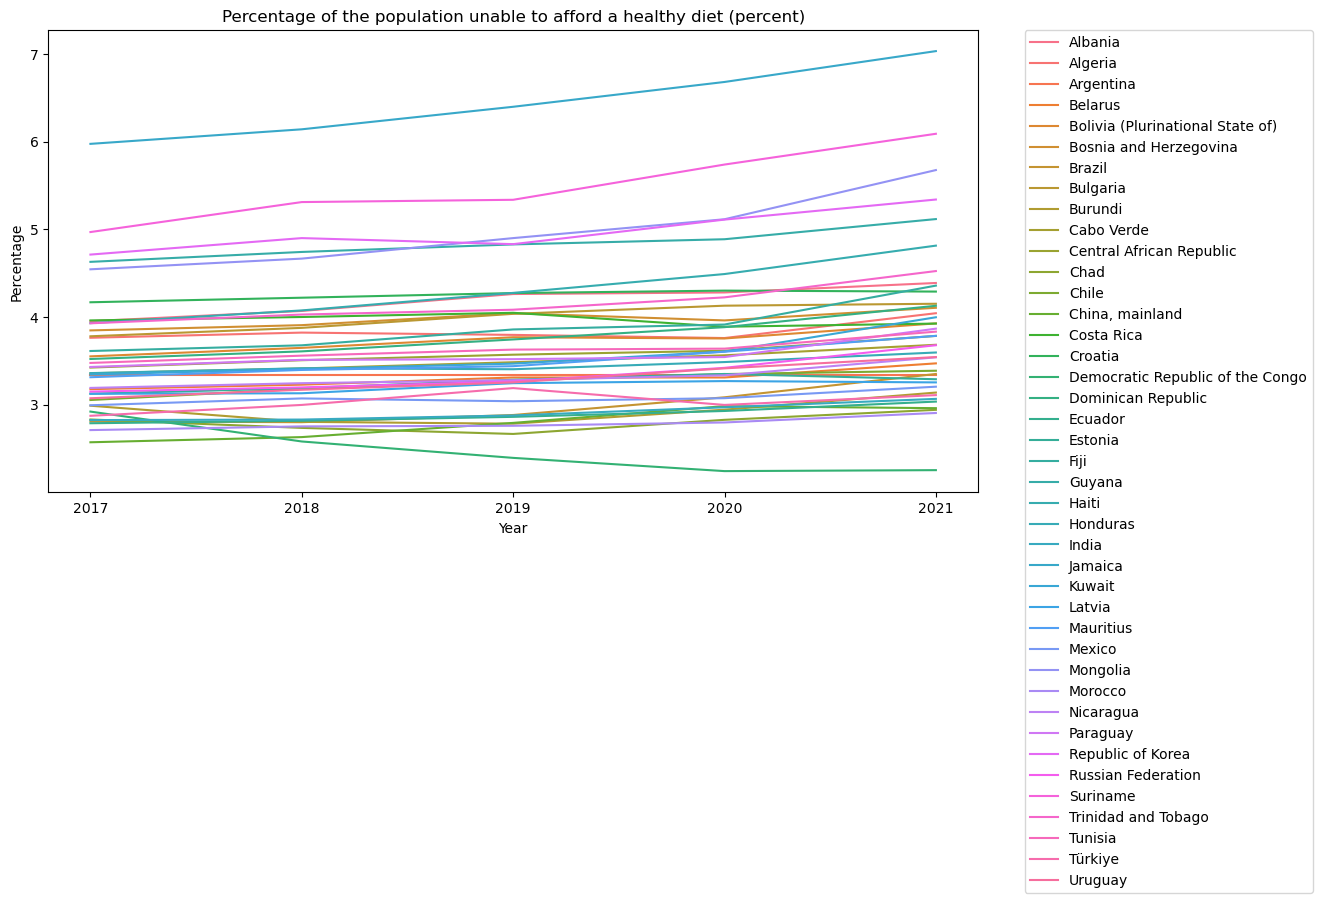

In [303]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Area', data=mean_cost_df)
plt.title('Percentage of the population unable to afford a healthy diet (percent)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(df['Year'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Continent Analysis of Cost of a healthy diet

In [297]:
# Continent mapping
continent_mapping = {
    'Africa': ['Algeria', 'Morocco', 'Cabo Verde', 'Mauritius', 'Democratic Republic of the Congo',
               'Chad', 'Central African Republic', 'Burundi', 'Comoros', 'South Sudan', 'Somalia'],
    'North America': ['Mexico', 'Jamaica', 'Trinidad & Tobago', 'Honduras', 'Nicaragua', 'Haiti',
                      'Cuba', 'Costa Rica', 'Dominican Republic', 'Guatemala'],
    'South America': ['Brazil', 'Venezuela', 'Suriname', 'Guyana',
                      'Bolivia (Plurinat. State of)', 'Ecuador','Chile','Uruguay','Argentina','Paraguay'],
    'Asia': ['China', 'Kuwait', 'Turkey', 'Uzbekistan', 'Mongolia', 'Korea (DPR)', 'India',
             'Afghanistan', 'Timor-Leste', 'Yemen','Fiji'],
    'Europe': ['Belarus', 'Bosnia & Herzegovina', 'Croatia', 'Estonia', 'Latvia', 'Bulgaria',
               'Albania', 'Russian Federation', 'Ukraine', 'Moldova (Republic of)']
}

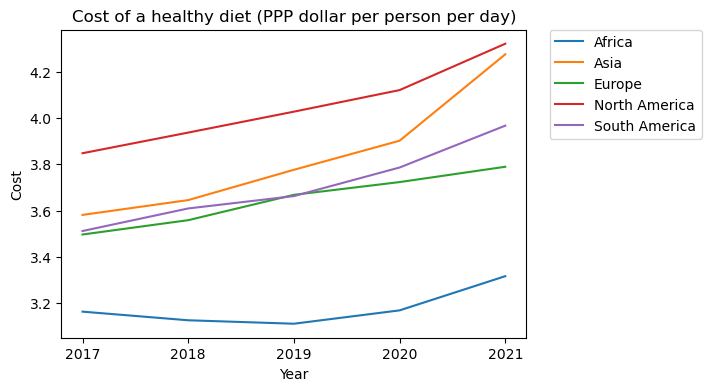

In [302]:

# Create a new 'Continent' column based on the continent mapping
mean_cost_df_continent = mean_cost_df.copy()
mean_cost_df_continent['Continent'] = mean_cost_df_continent['Area'].apply(lambda x: next((continent for continent, countries in continent_mapping.items() if x in countries), None))


# Group the DataFrame by 'Continent' and 'Year' and calculate the mean of the 'Value' column
dataframe_Cost_mean = mean_cost_df_continent.groupby(['Continent', 'Year'])['Value'].mean().reset_index()
#print(mean_df)

# Plot the line graph
plt.figure(figsize=(6, 4))
sns.lineplot(x='Year', y='Value', hue='Continent', data=dataframe_Cost_mean)
plt.title('Cost of a healthy diet (PPP dollar per person per day)')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.xticks(df['Year'].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Continent Analysis of Percentage of the population unable to afford a healthy diet

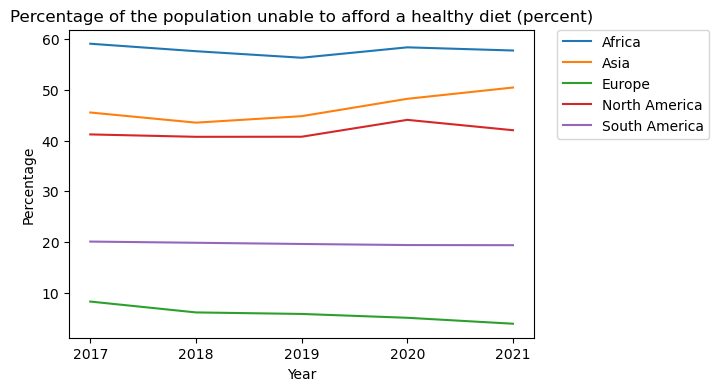

In [315]:

# Create a new 'Continent' column based on the continent mapping
mean_percentage_df_continent = mean_percentage_df.copy()
mean_percentage_df_continent['Continent'] = mean_percentage_df_continent['Area'].apply(lambda x: next((continent for continent, countries in continent_mapping.items() if x in countries), None))


# Group the DataFrame by 'Continent' and 'Year' and calculate the mean of the 'Value' column
dataframe_Percentage_mean = mean_percentage_df_continent.groupby(['Continent', 'Year'])['Value'].mean().reset_index()
#print(dataframe_Percentage_mean)

# Plot the line graph
plt.figure(figsize=(6, 4))
sns.lineplot(x='Year', y='Value', hue='Continent', data=dataframe_Percentage_mean)
plt.title('Percentage of the population unable to afford a healthy diet (percent)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(df['Year'].unique())
plt.show()

#### Country Wise Analysis in each Continent - Cost of a healthy diet

<Figure size 1200x600 with 0 Axes>

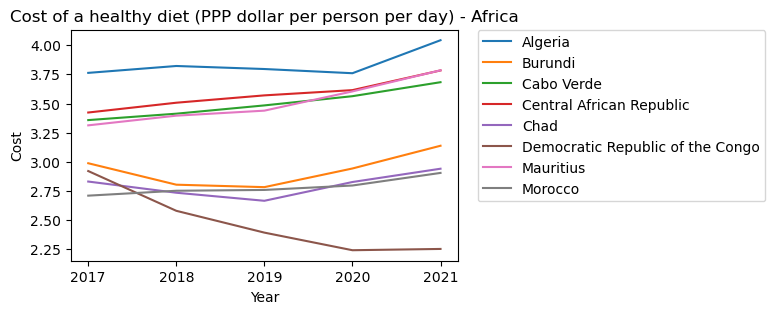

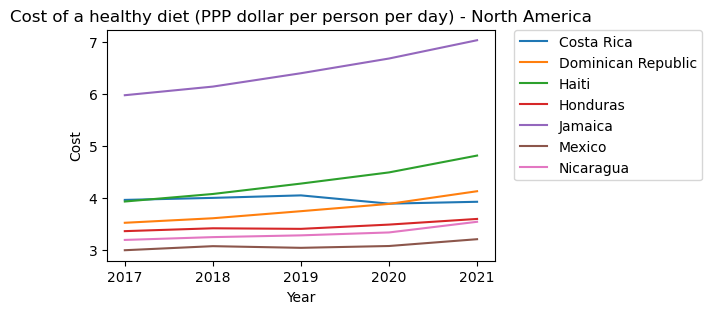

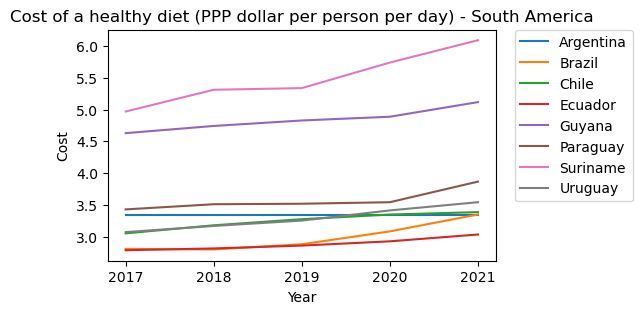

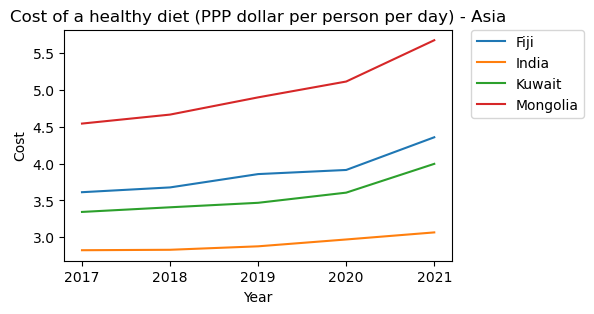

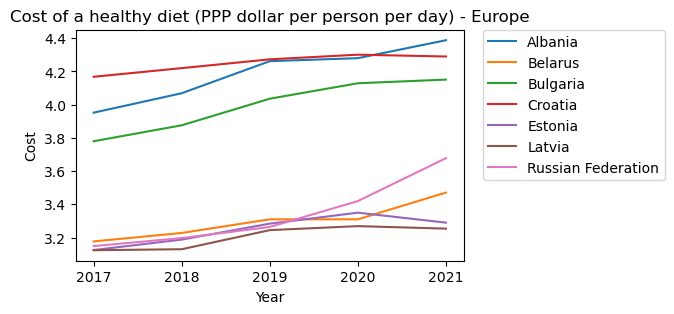

In [300]:
# Plot the line graphs for each continent
plt.figure(figsize=(12, 6))

for continent, countries in continent_mapping.items():
    continent_df = mean_cost_df[mean_cost_df['Area'].isin(countries)]
    #continent_df = mean_cost_df[mean_cost_df['Continent'] == continent]
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='Year', y='Value', hue='Area', data=continent_df, palette='tab10')
    plt.title(f'Cost of a healthy diet (PPP dollar per person per day) - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Cost')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(df['Year'].unique())
    plt.show()
    
    
    

#### Country Wise Analysis in Each Continent - Percentage of the population unable to afford a healthy diet

<Figure size 1200x600 with 0 Axes>

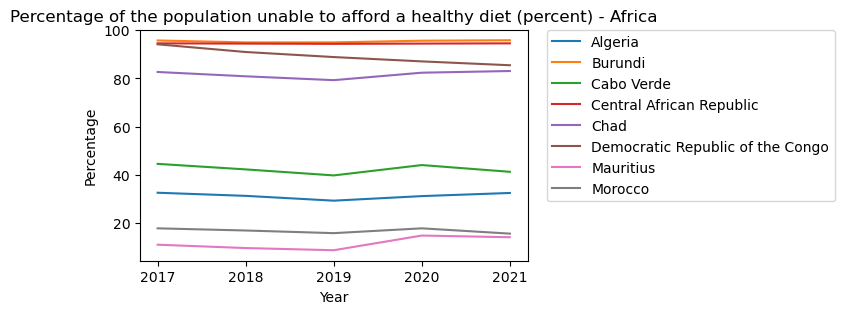

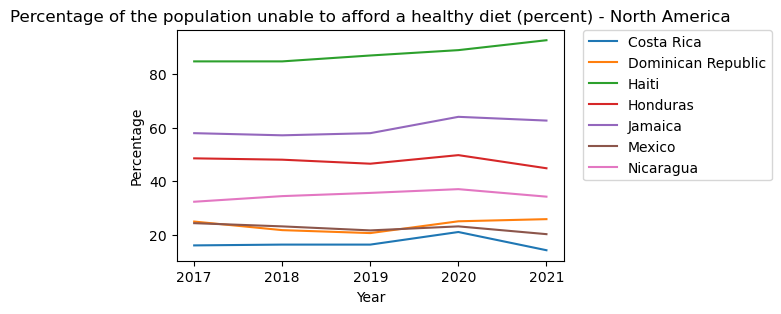

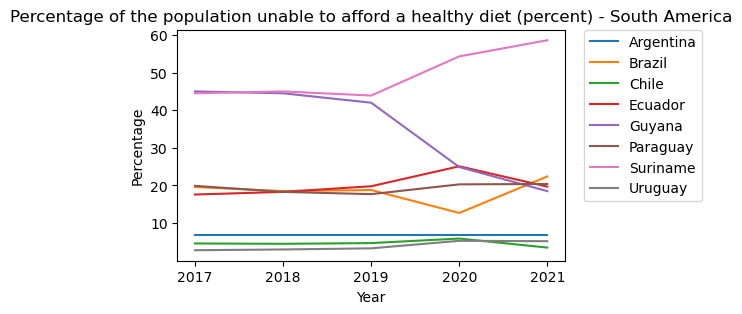

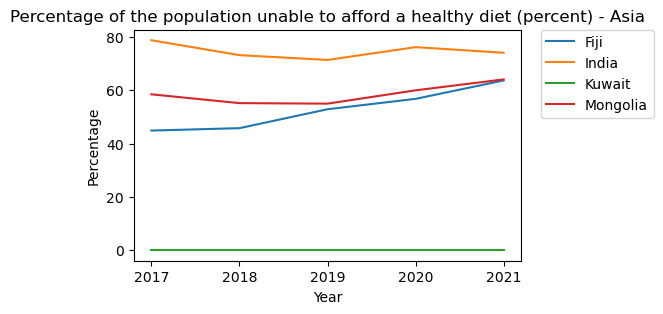

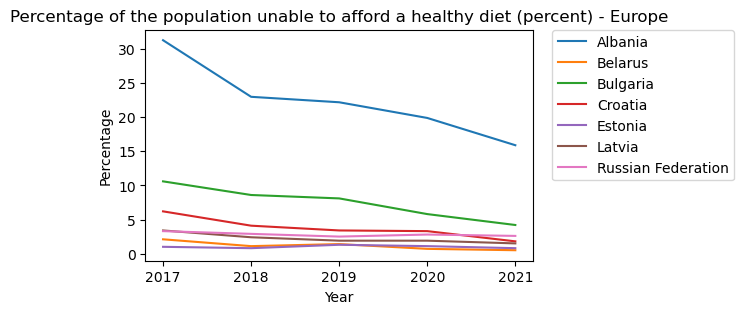

In [301]:
plt.figure(figsize=(12, 6))

for continent, countries in continent_mapping.items():
    continent_df = mean_percentage_df[mean_cost_df['Area'].isin(countries)]
    #continent_df = mean_cost_df[mean_cost_df['Continent'] == continent]
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='Year', y='Value', hue='Area', data=continent_df, palette='tab10')
    plt.title(f'Percentage of the population unable to afford a healthy diet (percent) - {continent}')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(df['Year'].unique())
    plt.show()
    
    
    